In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
data = pd.read_csv('C:/Users/dell/Downloads/Walmart_Sales.csv')


In [37]:
data.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [39]:
data.shape

(6435, 8)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [43]:
#Lets check for missing values
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [45]:
#Round 'Weekly_Sales' to 2 decimal places
data['Weekly_Sales']=data['Weekly_Sales'].astype(float).round(2)


In [47]:
#Round 'Temperature' to the nearest whole number
data['Temperature']=data['Temperature'].round(0).astype(int)

In [63]:
#Rounding of to the nearest decimal place
data['Fuel_Price']=data['Fuel_Price'].round(2)
data['CPI']=data['CPI'].round(3)
data['Unemployment']=data['Unemployment'].round(3)

In [65]:
# Convert Date to datetime format
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42,2.57,211.096,8.106
1,1,12-02-2010,1641957.44,1,39,2.55,211.242,8.106
2,1,19-02-2010,1611968.17,0,40,2.51,211.289,8.106
3,1,26-02-2010,1409727.59,0,47,2.56,211.320,8.106
4,1,05-03-2010,1554806.68,0,46,2.62,211.350,8.106


# QUESTIONS AND THEIR SOLUTIONS 
## 1. Which holidays affect weekly sales the most?

In [84]:
#Filter Holiday weeks
holiday_data = data[data['Holiday_Flag'] == 1]
holiday_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,1,12-02-2010,1641957.44,1,39,2.55,211.242,8.106
31,1,10-09-2010,1507460.69,1,79,2.56,211.495,7.787
42,1,26-11-2010,1955624.11,1,65,2.74,211.748,7.838
47,1,31-12-2010,1367320.01,1,48,2.94,211.405,7.838
53,1,11-02-2011,1649614.93,1,36,3.02,212.937,7.742


In [80]:
#Group by Date and Aggregate
holiday_sales = holiday_data.groupby('Date')['Weekly_Sales'].sum().reset_index()
holiday_sales.head()

,Date,Weekly_Sales
0,07-09-2012,48330059.31
1,09-09-2011,46763227.53
2,10-02-2012,50009407.92
3,10-09-2010,45634397.84
4,11-02-2011,47336192.79


In [74]:
#Identify Peak Holiday Week
top_holiday = holiday_sales.sort_values(by='Weekly_Sales', ascending=False).head(1)
print(top_holiday)


         Date  Weekly_Sales
6  25-11-2011   66593605.26


## Which stores in the dataset have the lowest and highest unemployment rate? Which factors do I think affect the employment rate?

In [90]:
# Group by Store and calculate average unemployment
unemployment_by_store = data.groupby('Store')['Unemployment'].mean()

# Find store with highest and lowest average unemployment
highest_unemp_store = unemployment_by_store.idxmax()
lowest_unemp_store = unemployment_by_store.idxmin()

print(f"Highest unemployment rate: Store {highest_unemp_store} ({unemployment_by_store[highest_unemp_store]:.2f}%)")
print(f"Lowest unemployment rate: Store {lowest_unemp_store} ({unemployment_by_store[lowest_unemp_store]:.2f}%)")


Highest unemployment rate: Store 12 (13.12%)
Lowest unemployment rate: Store 23 (4.80%)


Factors that I think would affect rate of employment are: Local Economy,Education levels, Seasonality

## Is there a correaltion between CPI and weekly Sales? How does the correaltion differ when the holiday flag is 0 versus when its 1 

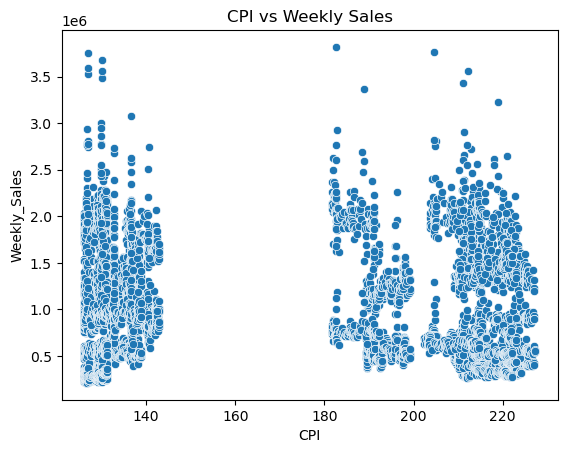

Correlation between CPI and Weekly Sales:
                    CPI  Weekly_Sales
CPI           1.000000     -0.072634
Weekly_Sales -0.072634      1.000000


In [105]:
sns.scatterplot(data=data, x='CPI', y='Weekly_Sales')
plt.title('CPI vs Weekly Sales')
plt.show()
# Correlation coefficient
correlation = data[['CPI', 'Weekly_Sales']].corr()
print("Correlation between CPI and Weekly Sales:\n", correlation)

The correlation between CPI and Weekly Sales is likely very weak or near zero. This is because CPI does not change much, It's not providing enough variability to explain changes in sales.

In [ ]:
holiday = data[data['Holiday_Flag'] == 1]
non_holiday = data[data['Holiday_Flag'] == 0]


                  CPI  Weekly_Sales
CPI           1.00000      -0.08097
Weekly_Sales -0.08097       1.00000
                   CPI  Weekly_Sales
CPI           1.000000     -0.071939
Weekly_Sales -0.071939      1.000000


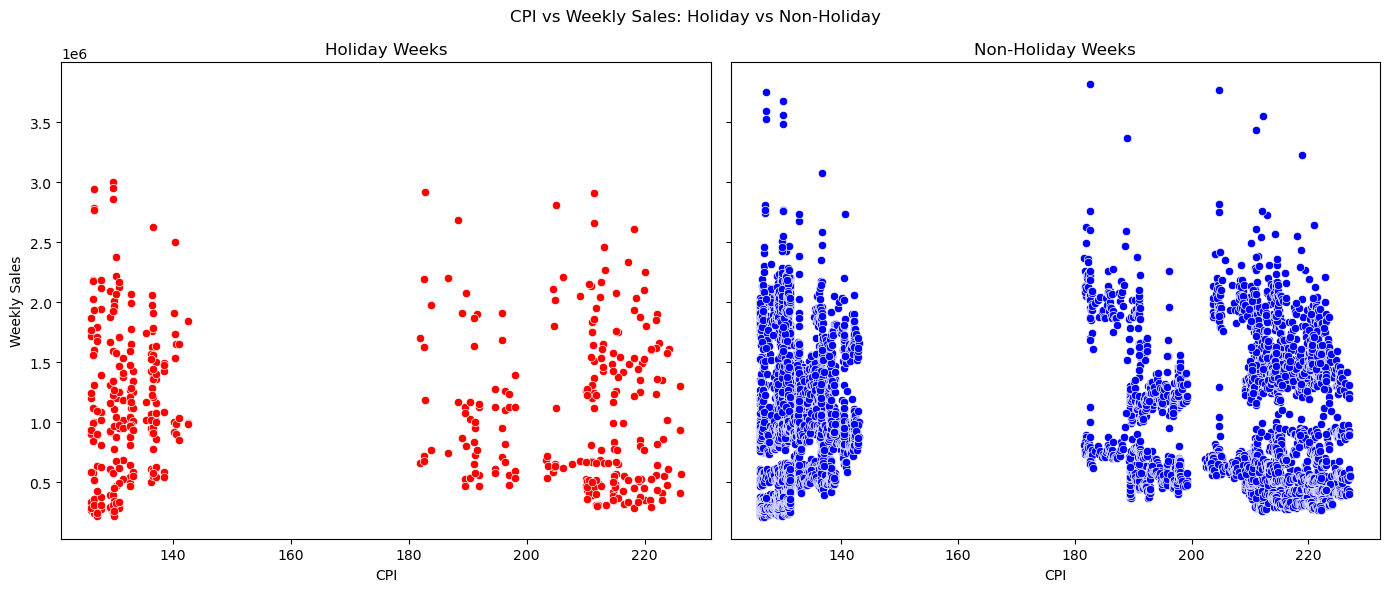

In [111]:
print(holiday [['CPI', 'Weekly_Sales']].corr())
print(non_holiday[['CPI', 'Weekly_Sales']].corr())
# Side-by-side scatter plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.scatterplot(data=holiday, x='CPI', y='Weekly_Sales', ax=axes[0], color='red')
axes[0].set_title('Holiday Weeks')
axes[0].set_xlabel('CPI')
axes[0].set_ylabel('Weekly Sales')

sns.scatterplot(data=non_holiday, x='CPI', y='Weekly_Sales', ax=axes[1], color='blue')
axes[1].set_title('Non-Holiday Weeks')
axes[1].set_xlabel('CPI')

plt.suptitle('CPI vs Weekly Sales: Holiday vs Non-Holiday')
plt.tight_layout()
plt.show()

Both correlations are negative but very weak — close to zero.

This suggests that CPI has almost no meaningful impact on Weekly Sales in either context.

The slight negative sign means that as CPI increases, Weekly Sales tend to decrease very slightly, but the effect is negligible.

## Why is the fuel price included in the dataset? What conclusions can be made about fuel price compared to any of the other fields?

Consumer Behavior Insight
1. Fuel prices can influence how far and how often people travel to shop.
In rural areas or regions with fewer stores, higher fuel costs may reduce shopping frequency.

2. Economic Indicator
Fuel prices often reflect broader economic conditions.
Retailers like Walmart may use it to anticipate shifts in consumer spending.

3. Temporal Trends
Fuel prices fluctuate seasonally and regionally.
Including it allows analysts to detect patterns over time, even if the effect is subtle.

4. Model Completeness
Including Fuel_Price ensures the model captures all potentially relevant variables.
Even weak predictors can contribute to ensemble models or interact with other features.

In [116]:
print(data[['Fuel_Price', 'Weekly_Sales']].corr())


              Fuel_Price  Weekly_Sales
Fuel_Price      1.000000      0.009515
Weekly_Sales    0.009515      1.000000


 Correlation between Fuel and Weekly Sales is very weak. This concludes that Fuel Prices do not affect weekly sales in the dataset.

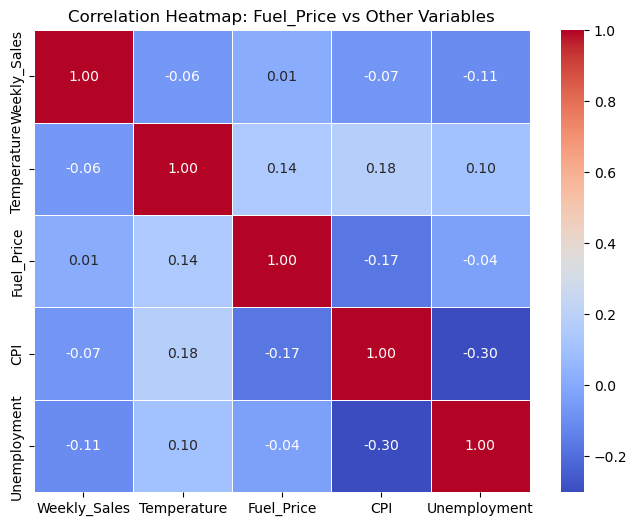

In [128]:
# Select relevant numeric columns
numeric_cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
correlation_matrix = data[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: Fuel_Price vs Other Variables')
plt.show()

- Fuel_Price vs Weekly_Sales: No correlation (0.01). Fuel price doesn’t affect sales.
- Fuel_Price vs CPI: Weak negative correlation (−0.17). Slight drop in CPI as fuel rises.
- Fuel_Price vs Temperature: Mild positive correlation (0.14). Possibly seasonal overlap.
- Fuel_Price vs Unemployment: Very weak negative correlation (−0.04). No real link.